In [1]:
import pandas as pd
from siuba import *
import numpy as np

In [2]:
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', 1000)

In [3]:
df= pd.read_parquet("dla_df.parquet")

In [4]:
df.sample()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name,adjusted_total_requested,adjusted_fed_requested,adjusted_ac_requested,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
9816,Obligated,HSIPL,5252(018),Parlier,2015-02-06,2015-02-06,2015-02-10,2015-02-19,2015-03-01,51030.0,0.0,56700.0,Authorized,5252,6,E-76 approved on E-76 approved on,0.0,13.0,10.0,FRE040401,Zediker Btwn 500' S/o To 750' N/o Manning; Es Manning From Zediker To 400' E/o,"Widen, Lt Trn Ln, Traff Sig Mod., Rt Trn Decel",2,NaT,NaT,CFCG,5252,2015.0,Parlier,64822.350296,58340.115266,0.0,0,0,0,0,0,0,0,0


In [5]:
# """
# from Tiffany's new-metrics notebook
# """

# ACTIVE_TRANSPORTATION = ['bike', 'bicycle', 'cyclist', 
#                          'pedestrian', 
#                          ## including the spelling errors of `pedestrian`
#                          'pedestrain',
#                          'crosswalk', 
#                          'bulb out', 'bulb-out', 
#                          'active transp', 'traffic reduction', 
#                          'speed reduction', 'ped', 'srts', 
#                          'safe routes to school',
#                          'sidewalk', 'side walk', 'Cl ', 'trail'
#                         ]
# TRANSIT = ['bus', 'metro', 'station', #Station comes up a few times as a charging station and also as a train station
#            'transit','fare', 'brt', 'yarts', 'rail'
#            # , 'station' in description and 'charging station' not in description
#           ] 
# BRIDGE = ["bridge", 'viaduct']
# STREET = ['traffic signal', 'resurface', 'resurfacing', 'slurry', 'seal' 
#           'sign', 'stripe', 'striping', 'median', 
#           'guard rail', 'guardrail', 
#           'road', 'street', 
#           'sinkhole', 'intersection', 'signal', 'curb',
#           'light', 'tree', 'pavement', 'roundabout'
#          ]

# FREEWAY = ['hov ', 'hot ', 'freeway', 'highway', 'express lanes', 'hwy']


# INFRA_RESILIENCY_ER = ['repair', 'emergency', 'replace','retrofit', 'er',
#                        'rehab', 'improvements', 'seismic', 'reconstruct', 'restoration']

# CONGESTION_RELIEF = ['congestion', 'rideshare','ridesharing', 'vanpool', 'car share']

# NOT_INC = ['charging', 'fueling', 'cng']

# def categorize_project_descriptions(row):
#     """
#     This function takes a individual type of work description (row of a dataframe)
#     and returns a dummy flag of 1 if it finds keyword present in
#     project categories (active transportation, transit, bridge, etc).
#     A description can contain multiple keywords across categories.
#     """
#     # Make lowercase
#     description = row.type_of_work.lower()
    
#     # Store a bunch of columns that will be flagged
#     # A project can involve multiple things...also, not sure what's in the descriptions
#     active_transp = 0
#     transit = 0
#     bridge = 0
#     street = 0
#     freeway = 0
#     infra_resiliency_er = 0
#     congestion_relief = 0
        
#     if any(word in description for word in ACTIVE_TRANSPORTATION):
#         active_transp = 1
        
#     #if any(word in description if instanceof(word, str) else word(description) for word in TRANSIT)

#     if (any(word in description for word in TRANSIT) and 
#         not any(exclude_word in description for exclude_word in NOT_INC)
#        ):
#         transit = 1
        
#     if any(word in description for word in BRIDGE):
#         bridge = 1
#     if any(word in description for word in STREET):
#         street = 1
#     if any(word in description for word in FREEWAY):
#         freeway = 1 
#     if any(word in description for word in INFRA_RESILIENCY_ER):
#         infra_resiliency_er = 1
#     if any(word in description for word in CONGESTION_RELIEF):
#         congestion_relief = 1    
        
        
#     return pd.Series(
#         [active_transp, transit, bridge, street, freeway, infra_resiliency_er, congestion_relief], 
#         index=['active_transp', 'transit', 'bridge', 'street', 
#                'freeway', 'infra_resiliency_er', 'congestion_relief']
#     )
   



In [9]:
#work_categories = df.apply(categorize_project_descriptions, axis=1)

In [10]:
#df2 = pd.concat([df, work_categories], axis=1)

In [11]:
# work_cols = list(work_categories.columns)
# print(work_cols)

# df2 = df2.assign(
#     work_categories = df2[work_cols].sum(axis=1)
# )

# df2.work_categories.value_counts()

['active_transp', 'transit', 'bridge', 'street', 'freeway', 'infra_resiliency_er', 'congestion_relief']


1    8752
2    8673
0    1941
3    1423
4      68
5       7
Name: work_categories, dtype: int64

In [9]:
df.work_categories.value_counts()

1    8800
2    8722
0    1953
3    1438
4      68
5       7
Name: work_categories, dtype: int64

In [7]:
df>>select(_.primary_agency_name, _.type_of_work)>>arrange(-_.type_of_work)

,primary_agency_name,type_of_work
8886,El Dorado County,_const. Class I Bike Trail
14133,Yosemite Area Regional Transportation System JPA,Yosemite Area Regional Transportation System (yarts) Public Outreach And
14527,Yosemite Area Regional Transportation System JPA,Yosemite Area Regional Transportation System (yarts) Public Outreach And
4239,Yosemite Area Regional Transportation System JPA,Yosemite Area Regional Transportation System (yarts) Public Outreach And
6341,Yosemite Area Regional Transportation System JPA,Yosemite Area Regional Transportation System (yarts) Public Outreach And
...,...,...
3827,Garden Grove,"""first Mile"" Bicycle And Pedestrian Trail Expansion (tc)"
5783,Garden Grove,"""first Mile"" Bicycle And Pedestrian Trail Expansion (tc)"
14543,Garden Grove,"""first Mile"" Bicycle And Pedestrian Trail Expansion (tc)"
18485,Garden Grove,"""first Mile"" Bicycle And Pedestrian Trail Expansion (tc)"


In [8]:
df>>filter(_.type_of_work.isnull())

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name,adjusted_total_requested,adjusted_fed_requested,adjusted_ac_requested,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories


In [10]:
list(df[df.work_categories==3].type_of_work.unique())

['Installing A Class Iii Bike Route, Reconstruct Asphalt Pavement, Ada Compliant',
 'Curb, Gutter, Sidewalk, And Ada-compliant Curb Ramps',
 'Install Controller Access Medians, Signal Upgrades And Pedestrian Refuges.',
 'Rehab Pavement And Restripe With Bike Lanes',
 'Install Bike Lanes,signing & Striping, Pvmnt Rehab',
 'Asphalt Concrete Overlay(resurface Existing Roadway With Hot Mix Asphalt)',
 'Bridge Railing Replacement',
 'Asphalt Concrete Roads, Bike Lanes, Evaluate And Revise Intersection',
 'Road Rehab,install Handicap Ramps,sidewalk,curb,construct Raised',
 'Construct Sidewalk, Curb & Gutter. (tc)',
 'Construct New Sidewalks, Curbs And Gutters, Class Ii Bicycle Lanes(tc)',
 'Sidewalk Gap Closures, Curb And Gutter, And Drainage Facilities (tc)',
 '(eo) Remove Large Tree From Pier #3, Pile Cap #4. Closed Nb Lane Of Bridge',
 'Rehabilitate Pavement And Implement Bike/ped Improvements',
 'Permanent Restoration - Replace Guardrail',
 'Install Cycle Track, Parking Protect Bikeways 

In [14]:
# list out descriptions where it's still zero keywords flagged
list(df[df.work_categories==0].type_of_work.unique())

['Add One Mixed-flow Lane In Each Direction',
 'Port Truck Reduction Program',
 'Bluff Face Stabilization',
 'Sf Bay Area: Regionwide: Implement Innovative Projects & Initiatives That',
 'Ingrain Walking & Rolling Into School Culture (tc)',
 'Study On-campus Parking Pricing',
 'Sf Bay Area: Regionwide: Planning And Implementation Of Various Multi-modal',
 'Eliminate Curve; Install 4-way Stop; Install Eastbound Left Turn Lane And',
 'Install Dynamic Variable Speed Warning Signs At 2 Locations For Downhill',
 'Construction',
 '18/19 Traffic Count Program',
 'Scour Protection (tc)',
 'Grade Separation ,harney Lane At Upr.(tc)',
 'The Spare The Air Program Is An Ongoing Regional, Seasonal Public Outreach',
 'Install Traffic Signs, Flashing Beacons And Markings (tc)',
 'Landscaping & Enhancements - Phase 2',
 'Inst. Spd. Feedback Signs, Lts, Warning Sign(tc)',
 'Purchase Cng Refuse Truck',
 'Construct Left Turn Channelizations Along South Union Avenue.',
 'Ppm (rstp) Phase 3, 2019 (tc)',
 '

In [13]:
len(df[df.work_categories==0].type_of_work.unique())

876

In [12]:
(len(df>>filter(_.work_categories==0)))

1953

In [16]:
print(f'{(((len(df>>filter(_.work_categories==0))))/len(df))*100}% of obligations not included in Project Categorties')

9.305317324185248% of obligations not included in Project Categorties


In [17]:
none = (df>>filter(_.work_categories==0))

In [18]:
none.sample(5)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name,adjusted_total_requested,adjusted_fed_requested,adjusted_ac_requested,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
21559,Obligated,STPL,6066(190),San Diego Association Of Governments,2022-02-08,2022-02-10,2022-02-21,2022-03-01,2022-03-03,2421000.0,0.0,2421000.0,Authorized,6066,11,E-76 approved on,3.0,19.0,2.0,SAN254,In San Diego County In The Mission Valley Corridor From The Mouth Of The San,This Project Is A Comprehensive Integrated Management Plan For Increasing,1,2022-02-07,2022-02-09,SDAG,6066,2022.0,San Diego Association of Governments,2.333356e+06,2.333356e+06,0.0,0,0,0,0,0,0,0,0
12165,Obligated,HSIPL,5919(118),Placer County,2014-03-21,2014-03-21,2014-04-02,2014-04-08,2014-04-15,157500.0,0.0,175000.0,Authorized,5919,3,E-76 approved on E-76 approved on,0.0,18.0,7.0,PLA25567,18 Various Locations Throughout Placer County (see Comments),Install High Friction Surface Treatment,1,NaT,NaT,SACOG,5919,2014.0,Placer County,2.003063e+05,1.802757e+05,0.0,0,0,0,0,0,0,0,0
11845,Obligated,CML,5060(284),Fresno,2014-05-15,2014-05-15,2014-05-16,2014-05-23,2014-05-29,148200.0,0.0,148200.0,Authorized,5060,6,E-76 approved on E-76 approved on,0.0,8.0,6.0,nan,Fresno St From B St To Divisadero; Van Ness Ave From Ventura Ave To Divisadero,Install Its Communications (tc),1,NaT,NaT,CFCG,5060,2014.0,Fresno,1.696308e+05,1.696308e+05,0.0,0,0,0,0,0,0,0,0
1717,Obligated,ATF5512,6084(184),Metropolitan Transportation Commission,2018-04-26,2018-04-26,2018-04-26,2018-04-26,2018-05-04,0.0,0.0,0.0,Authorized,6084,4,E-76 approved on,NaN,0.0,8.0,nan,San Francisco Bay Area,Travel Model Research Mtc & Sfcta,4,NaT,NaT,MTC,6084,2018.0,Metropolitan Transportation Commission,0.000000e+00,0.000000e+00,0.0,0,0,0,0,0,0,0,0
906,Obligated,CML,5206(017),Angels,2018-07-10,2018-07-16,2018-07-18,2018-07-24,2018-07-31,7000.0,0.0,7000.0,Authorized,5206,10,E-76 approved on,13.0,8.0,7.0,CMAQ-EV,"City Of Angels Visitor Center Parking Lot, 1192 South Main Street, Angels Camp.",Install Two High Rate Charging Station. (tc),1,2018-07-03,2018-07-11,NON-MPO,5206,2018.0,Angels,7.553717e+03,7.553717e+03,0.0,0,0,0,0,0,0,0,0


## Groupings

In [22]:
#heatmap help from towards_data_science: https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c

In [23]:
# groups = (df2.groupby(['active_transp', 'transit', 'bridge',
#                      'street','freeway','infra_resiliency_er', 'congestion_relief', ])
#                .agg({'adjusted_total_requested':'mean'}).reset_index())

In [24]:
import seaborn as sns
from shared_utils import calitp_color_palette as cp
import matplotlib.pyplot as plt
import matplotlib as mpl

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:73: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:73: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You mi

In [25]:
sum_groups = (df2.groupby(['prepared_y'])
               .agg({'active_transp':'sum', 'transit':'sum', 'bridge':'sum',
                      'street':'sum','freeway':'sum','infra_resiliency_er':'sum',
                     'congestion_relief':'sum'}).reset_index())

In [26]:
sum_groups.set_index('prepared_y', inplace=True)

In [27]:
sum_groups

,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief
prepared_y,,,,,,,
2010.0,0,0,0,1,0,0,0
2011.0,0,0,1,3,1,2,0
2012.0,4,0,0,2,0,0,0
2013.0,39,11,36,58,2,102,0
2014.0,631,112,431,1045,12,1487,14
2015.0,600,105,455,924,23,1427,16
2016.0,606,118,459,952,52,1360,19
2017.0,599,113,420,976,25,1363,19
2018.0,576,138,423,1142,22,1781,28


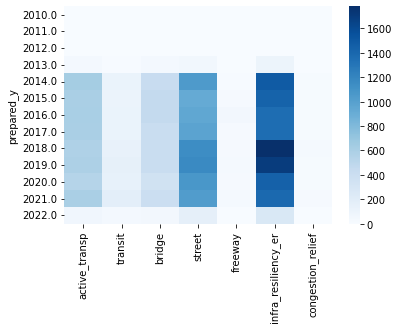

In [28]:
ax = sns.heatmap(sum_groups, cmap="Blues")

In [29]:
df_corr = sum_groups.corr()

In [30]:
df_corr

,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief
active_transp,1.000000,0.944380,0.996292,0.984472,0.827256,0.979728,0.927876
transit,0.944380,1.000000,0.927917,0.970653,0.820216,0.957733,0.943587
bridge,0.996292,0.927917,1.000000,0.975501,0.843388,0.976707,0.923776
street,0.984472,0.970653,0.975501,1.000000,0.800513,0.995885,0.940751
freeway,0.827256,0.820216,0.843388,0.800513,1.000000,0.789025,0.813511
infra_resiliency_er,0.979728,0.957733,0.976707,0.995885,0.789025,1.000000,0.942256
congestion_relief,0.927876,0.943587,0.923776,0.940751,0.813511,0.942256,1.000000


In [31]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

/tmp/ipykernel_982/3020399775.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [32]:
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

/tmp/ipykernel_982/3713700341.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


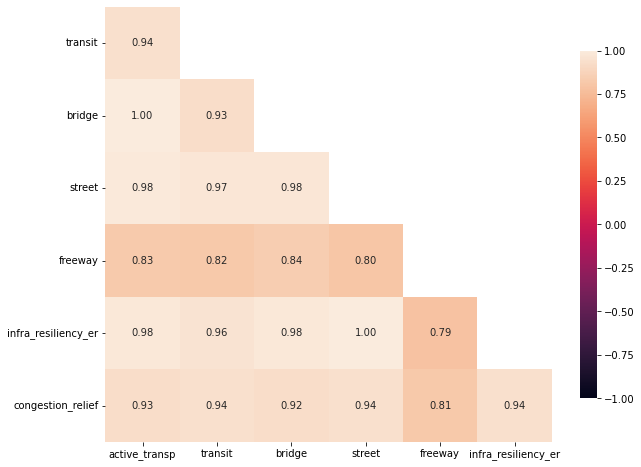

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))

# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

## Word Cloud

In [34]:
# !pip install nltk
# ! pip install textblob
# ! pip install wordcloud

In [35]:
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [37]:
import re

In [38]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
df3= none[['type_of_work']]

In [40]:
df3

,type_of_work
13,Add One Mixed-flow Lane In Each Direction
51,Port Truck Reduction Program
55,Bluff Face Stabilization
66,Sf Bay Area: Regionwide: Implement Innovative Projects & Initiatives That
68,Ingrain Walking & Rolling Into School Culture (tc)
...,...
23449,"Install Its Adaptive System, Upgrade Detection And Synchronize Corridor. (tc)"
23521,Grade Separation
23539,Widen 2 To 4 Lanes - 2 Way Left Turn Lanes (tc)
23551,"Install Upgraded Led-enhanced Flashing Stop And Stop Ahead Signs, Install"


In [41]:
text = df3.squeeze().tolist() 

In [42]:
text

['Add One Mixed-flow Lane In Each Direction',
 'Port Truck Reduction Program',
 'Bluff Face Stabilization',
 'Sf Bay Area: Regionwide: Implement Innovative Projects & Initiatives That',
 'Ingrain Walking & Rolling Into School Culture (tc)',
 'Study On-campus Parking Pricing',
 'Sf Bay Area: Regionwide: Planning And Implementation Of Various Multi-modal',
 'Eliminate Curve; Install 4-way Stop; Install Eastbound Left Turn Lane And',
 'Install Dynamic Variable Speed Warning Signs At 2 Locations For Downhill',
 'Construction',
 '18/19 Traffic Count Program',
 'Scour Protection (tc)',
 'Grade Separation ,harney Lane At Upr.(tc)',
 'The Spare The Air Program Is An Ongoing Regional, Seasonal Public Outreach',
 'Install Traffic Signs, Flashing Beacons And Markings (tc)',
 'Landscaping & Enhancements - Phase 2',
 'Inst. Spd. Feedback Signs, Lts, Warning Sign(tc)',
 'Purchase Cng Refuse Truck',
 'Construct Left Turn Channelizations Along South Union Avenue.',
 'Ppm (rstp) Phase 3, 2019 (tc)',
 '

In [43]:
text = ' '.join(text).lower()

In [44]:
#swords = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]

In [45]:
def clean_string(text):
    text = re.sub(r"[^A-z\s]", "", text)
    swords = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]
    swords.append('tc')
    swords.append('install')
    
    cleaned_list_of_words = [word for word in word_tokenize(text.lower()) if word not in swords]

    return cleaned_list_of_words

In [46]:
clean_text = clean_string(text)

In [47]:
clean_text

['add',
 'one',
 'mixedflow',
 'lane',
 'direction',
 'port',
 'truck',
 'reduction',
 'program',
 'bluff',
 'face',
 'stabilization',
 'sf',
 'bay',
 'area',
 'regionwide',
 'implement',
 'innovative',
 'projects',
 'initiatives',
 'ingrain',
 'walking',
 'rolling',
 'school',
 'culture',
 'study',
 'oncampus',
 'parking',
 'pricing',
 'sf',
 'bay',
 'area',
 'regionwide',
 'planning',
 'implementation',
 'various',
 'multimodal',
 'eliminate',
 'curve',
 'way',
 'stop',
 'eastbound',
 'left',
 'turn',
 'lane',
 'dynamic',
 'variable',
 'speed',
 'warning',
 'signs',
 'locations',
 'downhill',
 'construction',
 'traffic',
 'count',
 'program',
 'scour',
 'protection',
 'grade',
 'separation',
 'harney',
 'lane',
 'uprtc',
 'spare',
 'air',
 'program',
 'ongoing',
 'regional',
 'seasonal',
 'public',
 'outreach',
 'traffic',
 'signs',
 'flashing',
 'beacons',
 'markings',
 'landscaping',
 'enhancements',
 'phase',
 'inst',
 'spd',
 'feedback',
 'signs',
 'lts',
 'warning',
 'signtc',
 

In [48]:
df4 = df3.squeeze()

In [49]:
df4 = df4.to_list()

In [50]:
df4

['Add One Mixed-flow Lane In Each Direction',
 'Port Truck Reduction Program',
 'Bluff Face Stabilization',
 'Sf Bay Area: Regionwide: Implement Innovative Projects & Initiatives That',
 'Ingrain Walking & Rolling Into School Culture (tc)',
 'Study On-campus Parking Pricing',
 'Sf Bay Area: Regionwide: Planning And Implementation Of Various Multi-modal',
 'Eliminate Curve; Install 4-way Stop; Install Eastbound Left Turn Lane And',
 'Install Dynamic Variable Speed Warning Signs At 2 Locations For Downhill',
 'Construction',
 '18/19 Traffic Count Program',
 'Scour Protection (tc)',
 'Grade Separation ,harney Lane At Upr.(tc)',
 'The Spare The Air Program Is An Ongoing Regional, Seasonal Public Outreach',
 'Install Traffic Signs, Flashing Beacons And Markings (tc)',
 'Landscaping & Enhancements - Phase 2',
 'Inst. Spd. Feedback Signs, Lts, Warning Sign(tc)',
 'Purchase Cng Refuse Truck',
 'Construct Left Turn Channelizations Along South Union Avenue.',
 'Ppm (rstp) Phase 3, 2019 (tc)',
 '

In [51]:
#need a cleaned list of strings, not a list of words

In [52]:
# cleaned_work_list = [clean_string(row)for row in df4] 

In [53]:
# cleaned_work_list

## Word Clouds

In [54]:
def word_cloud_gen(df):
    test = ' '.join(df).lower() 
    wordcloud2 = WordCloud(width=800, height=400, stopwords = STOPWORDS,
                      collocations=True, background_color='white', ).generate(test)
    
    plt.figure( figsize=(12,6))
    plt.imshow(wordcloud2, interpolation='bilInear')
    plt.axis('off')
    plt.show()

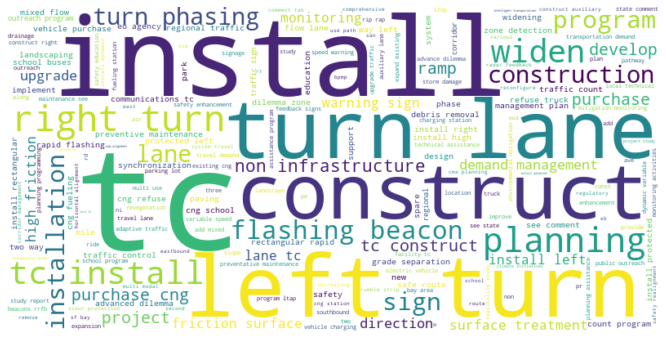

In [55]:
#Before cleaning
word_cloud_gen(df4)

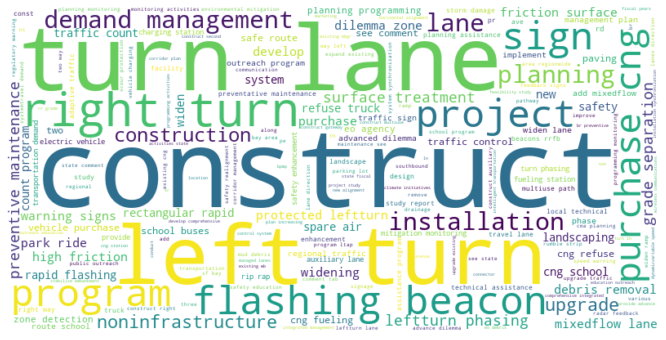

In [56]:
#after cleaning
word_cloud_gen(clean_text)

using the word clouds I added the following words to the categories: 
- trail
- restoration
- roundabout 

## To Function

In [19]:
# def add_categories(df):

#     ACTIVE_TRANSPORTATION = ['bike', 'bicycle', 'cyclist', 
#                              'pedestrian', 
#                              ## including the spelling errors of `pedestrian`
#                              'pedestrain',
#                              'crosswalk', 
#                              'bulb out', 'bulb-out', 
#                              'active transp', 'traffic reduction', 
#                              'speed reduction', 'ped', 'srts', 
#                              'safe routes to school',
#                              'sidewalk', 'side walk', 'Cl ', 'trail'
#                             ]
#     TRANSIT = ['bus', 'metro', 'station', #Station comes up a few times as a charging station and also as a train station
#                'transit','fare', 'brt', 'yarts', 'rail'
#                # , 'station' in description and 'charging station' not in description
#               ] 
#     BRIDGE = ["bridge", 'viaduct']
#     STREET = ['traffic signal', 'resurface', 'resurfacing', 'slurry', 'seal' 
#               'sign', 'stripe', 'striping', 'median', 
#               'guard rail', 'guardrail', 
#               'road', 'street', 
#               'sinkhole', 'intersection', 'signal', 'curb',
#               'light', 'tree', 'pavement', 'roundabout'
#              ]

#     FREEWAY = ['hov ', 'hot ', 'freeway', 'highway', 'express lanes', 'hwy']


#     INFRA_RESILIENCY_ER = ['repair', 'emergency', 'replace','retrofit', 'er',
#                            'rehab', 'improvements', 'seismic', 'reconstruct', 'restoration']

#     CONGESTION_RELIEF = ['congestion', 'rideshare','ridesharing', 'vanpool', 'car share']

#     NOT_INC = ['charging', 'fueling', 'cng']

#     def categorize_project_descriptions(row):
#         """
#         This function takes a individual type of work description (row of a dataframe)
#         and returns a dummy flag of 1 if it finds keyword present in
#         project categories (active transportation, transit, bridge, etc).
#         A description can contain multiple keywords across categories.
#         """
#         # Make lowercase
#         description = row.type_of_work.lower()
    
#         # Store a bunch of columns that will be flagged
#         # A project can involve multiple things...also, not sure what's in the descriptions
#         active_transp = 0
#         transit = 0
#         bridge = 0
#         street = 0
#         freeway = 0
#         infra_resiliency_er = 0
#         congestion_relief = 0
        
#         if any(word in description for word in ACTIVE_TRANSPORTATION):
#             active_transp = 1
        
#         #if any(word in description if instanceof(word, str) else word(description) for word in TRANSIT)

#         if (any(word in description for word in TRANSIT) and 
#             not any(exclude_word in description for exclude_word in NOT_INC)
#            ):
#             transit = 1
        
#         if any(word in description for word in BRIDGE):
#             bridge = 1
#         if any(word in description for word in STREET):
#             street = 1
#         if any(word in description for word in FREEWAY):
#             freeway = 1 
#         if any(word in description for word in INFRA_RESILIENCY_ER):
#             infra_resiliency_er = 1
#         if any(word in description for word in CONGESTION_RELIEF):
#             congestion_relief = 1    
        
        
#         return pd.Series(
#             [active_transp, transit, bridge, street, freeway, infra_resiliency_er, congestion_relief], 
#             index=['active_transp', 'transit', 'bridge', 'street', 
#                    'freeway', 'infra_resiliency_er', 'congestion_relief']
#         )
    
    
#     work_categories = df.apply(categorize_project_descriptions, axis=1)
    
#     work_cols = list(work_categories.columns)
#     df2 = pd.concat([df, work_categories], axis=1)
    
#     df2 = df2.assign(work_categories = df2[work_cols].sum(axis=1))
    
#     return(df2)




In [20]:
# test = add_categories(df)

In [21]:
# test